## Data visualization assignment

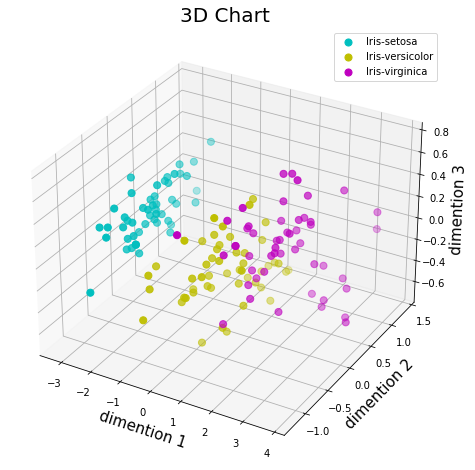

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn import datasets
import random

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
x = df.loc[:, features].values
y = df.loc[:,['target']].values
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents, columns = ['dimention 1', 'dimention 2', 'dimention 3'])
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
x_vals = finalDf['dimention 1']
y_vals = finalDf['dimention 2']
z_vals = finalDf['dimention 3']



fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('dimention 1', fontsize = 15)
ax.set_ylabel('dimention 2', fontsize = 15)
ax.set_zlabel('dimention 3', fontsize = 15)
ax.set_title('3D Chart', fontsize = 20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['c', 'y', 'm']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'dimention 1']
               , finalDf.loc[indicesToKeep, 'dimention 2']
               , finalDf.loc[indicesToKeep, 'dimention 3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
plt.show()